In [1]:
import networkx as nx
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl 
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] # 显示中文
plt.rcParams['axes.unicode_minus'] = False # 显示负号


一般来说，如果一个人的节点连接数越多，就显得这个人越重要

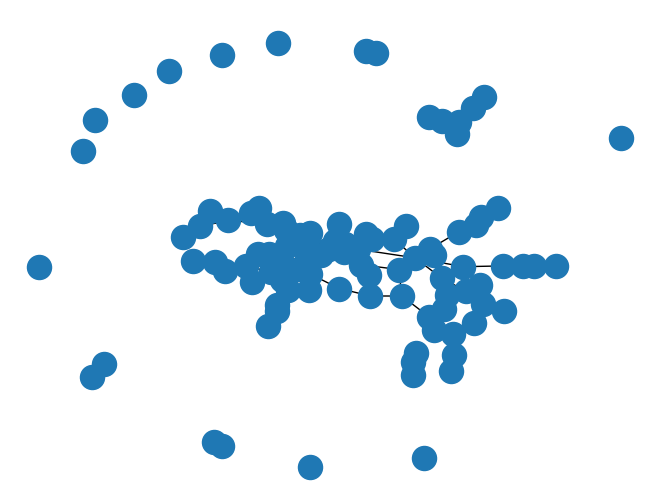

In [2]:
G = nx.gnp_random_graph(100,0.02,seed=12932)# 一个随机图，有100个节点，每个节点产生连接的概率为0.02
nx.draw(G)

### 最大连通域子图
找到上面图中最大的连通域子图

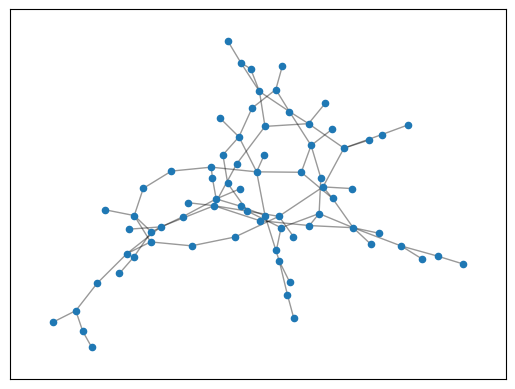

In [3]:
Gcc = G.subgraph(sorted(nx.connected_components(G),key=len,reverse=True)[0])
pos = nx.spring_layout(Gcc,seed = 10396953)
nx.draw_networkx_nodes(Gcc,pos,node_size=20)
nx.draw_networkx_edges(Gcc,pos,alpha=0.4)

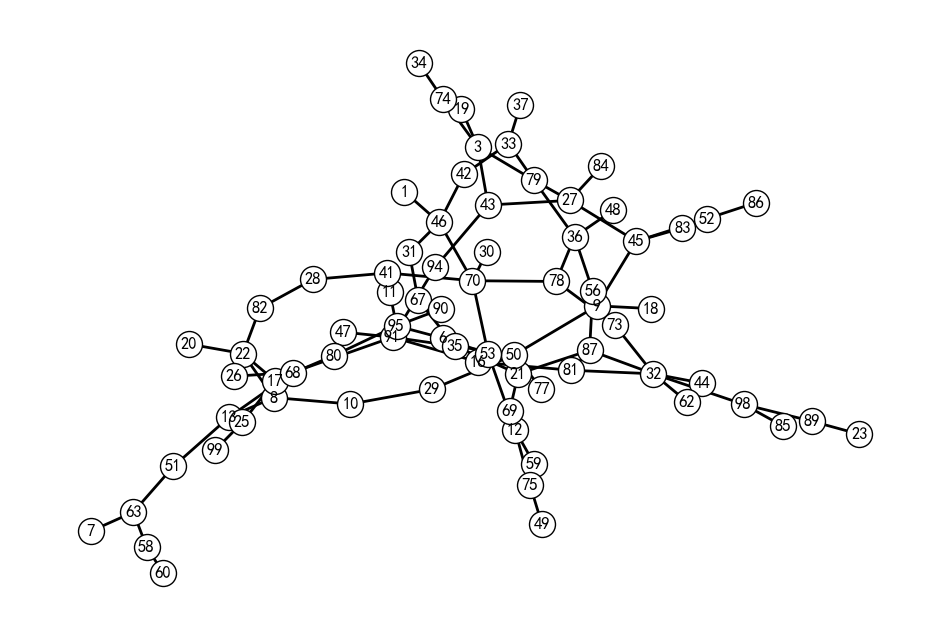

In [5]:
# 论文中用下面这种图比较好
plt.figure(figsize=(12,8))
pos = nx.spring_layout(Gcc,seed = 10396953)

# 设置其他可视化样式
options = {
    "font_size": 12,
    "node_size":350,
    "node_color":"white",
    "edgecolors":"black",
    "linewidths":1,#节点宽度
    "width":2,#edge线宽
}
nx.draw_networkx(Gcc,pos,**options)

ax = plt.gca()
plt.axis("off")
plt.show()

In [6]:
# 分析每个节点的连接数
Gcc.degree()

DegreeView({1: 1, 3: 4, 6: 2, 7: 1, 8: 3, 9: 4, 10: 2, 11: 2, 12: 3, 13: 3, 16: 2, 17: 3, 18: 1, 19: 2, 20: 1, 21: 3, 22: 4, 23: 1, 25: 2, 26: 1, 27: 4, 28: 2, 29: 2, 30: 1, 31: 2, 32: 6, 33: 3, 34: 1, 35: 4, 36: 4, 37: 1, 41: 3, 42: 2, 43: 3, 44: 1, 45: 4, 46: 4, 47: 1, 48: 1, 49: 1, 50: 4, 51: 2, 52: 2, 53: 3, 56: 2, 58: 2, 59: 1, 60: 1, 62: 1, 63: 3, 67: 2, 68: 3, 69: 1, 70: 5, 73: 3, 74: 3, 75: 2, 77: 1, 78: 3, 79: 4, 80: 2, 81: 3, 82: 2, 83: 1, 84: 1, 85: 1, 86: 1, 87: 4, 89: 2, 90: 1, 91: 5, 94: 2, 95: 4, 98: 3, 99: 1})

In [7]:
## 对上面结果进行排序
degree_sequence = sorted((d for n,d in G.degree()),reverse=True)
degree_sequence

[6,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

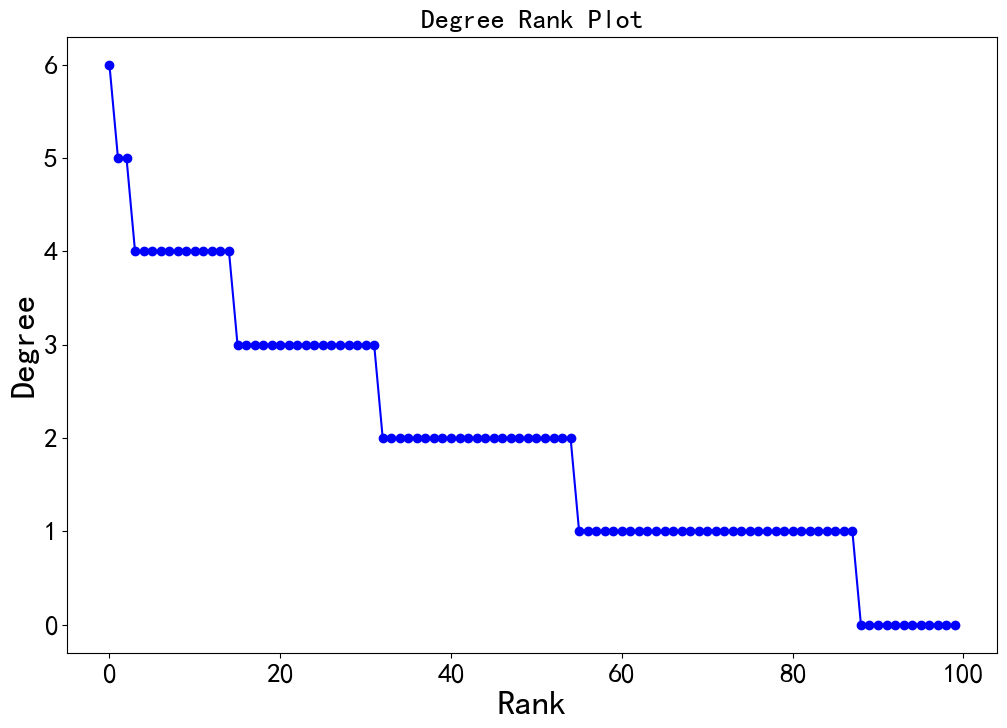

In [10]:
plt.figure(figsize=(12,8))
plt.plot(degree_sequence,"b-",marker="o")
plt.title('Degree Rank Plot',fontsize=20)
plt.ylabel('Degree',fontsize=25)
plt.xlabel('Rank',fontsize=25)
plt.tick_params(labelsize = 20)
plt.show()


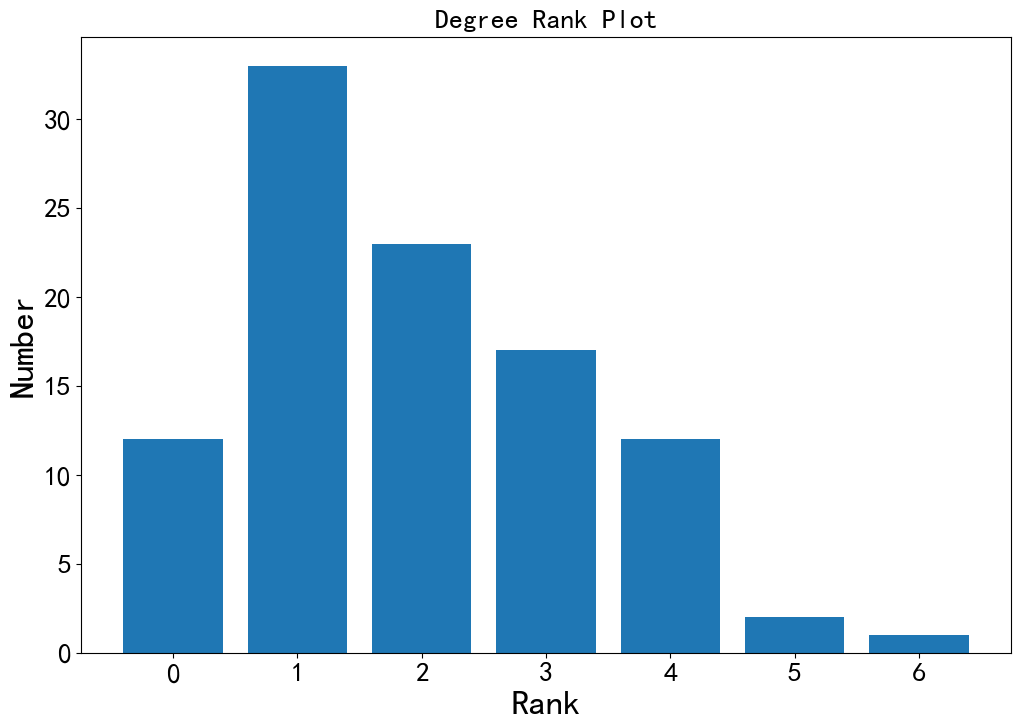

In [12]:
X = np.unique(degree_sequence,return_counts=True)[0]
Y = np.unique(degree_sequence,return_counts=True)[1]
plt.figure(figsize=(12,8))
plt.bar(X,Y)
plt.title('Degree Rank Plot',fontsize=20)
plt.ylabel('Number',fontsize=25)
plt.xlabel('Rank',fontsize=25)
plt.tick_params(labelsize = 20)
plt.show()